# Sanity check

The model for essay set 8 has such dismal cross-validation performance (less then 0.05) that is raises suspicion of coding errors. This is a more hands-on exploration of essay set 8 that unfortunately seems to confirm the dismal performance.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from asap_essay_scoring import data
from asap_essay_scoring import metrics
from asap_essay_scoring import learners

# Configure
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
TARGET = 'domain1_score' # A simplification for now; ignoring `domain2_score` for essay set 2
USE_EMBEDDINGS = False

# Data
dm = data.DataManager(target = TARGET, use_embeddings=USE_EMBEDDINGS)
training_data = dm.prepare_data()

# Essay set 8 had a particularly bad baseline score -- why?
grp8 = np.where(8 == training_data.group)
data = training_data.select(grp8)
df = data.X.copy()
df['y'] = data.y

## The basic correlation we expect is there

In [2]:
print(df.y.corr(df.nchar))
print(df.y.corr(df.nword))

0.548728016899
0.531599203571


Text(0,0.5,'Label')

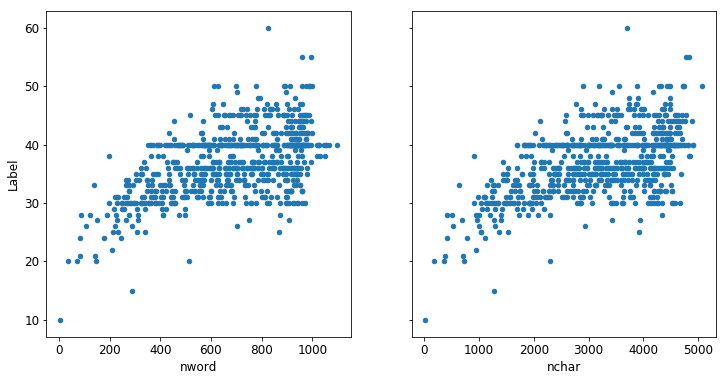

In [3]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 6))
df.plot(x = 'nword', y = 'y', kind = 'scatter', ax = ax1)
df.plot(x = 'nchar', y = 'y', kind = 'scatter', ax = ax2)
ax1.set_ylabel("Label")

## A predictive model looks reasonable

In [4]:
# Fit a model only on essay set 8
learner = learners.Lgbm()
learner.train(data)
preds = pd.DataFrame({
    'pred': np.round(learner.predict(data.X)).astype('int'),
    'truth': data.y,
    'essay_set': 8
})

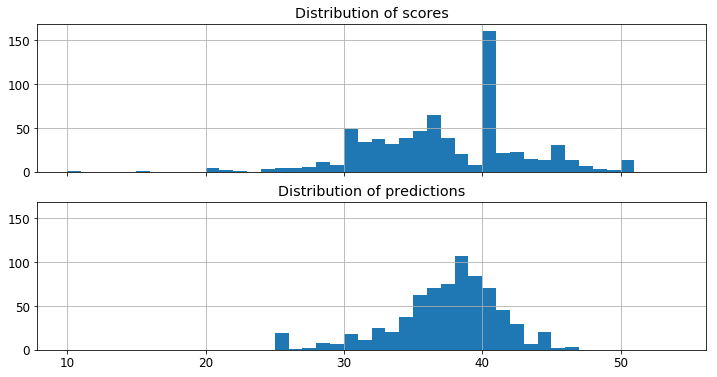

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))
ax1.set_title('Distribution of scores')
preds.truth.hist(ax = ax1, bins = range(10,55))
ax2.set_title('Distribution of predictions')
preds.pred.hist(ax = ax2, bins = range(10,55))

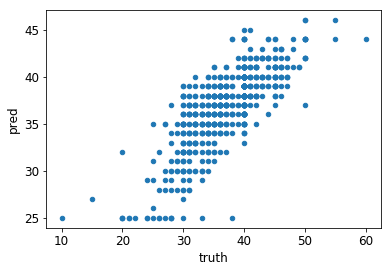

In [6]:
preds.plot(x = 'truth', y = 'pred', kind = 'scatter')

## However, the qwk score is very weak

In [8]:
# Compute the qwk for the fitted values, which should be upper bound for the cv performance
metrics.mykappa(8, preds)

0.06578693011283332